In [99]:
import pandas as pd
import seaborn as sns
import numpy as np

In [100]:
#Load the Titanic dataset from Seaborn into a Pandas DataFrame
df = sns.load_dataset("titanic")
#Display the first few rows of the dataset
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [101]:
#Check for missing values
Missing_values=df.isnull().sum()
print(Missing_values)

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


In [102]:
#Missing value treatment for Deck
missing_deck=df['deck'].isnull()
num_missing=missing_deck.sum()
possible_decks=df['deck'].dropna().unique()
random_deck=np.random.choice(possible_decks,num_missing)
df.loc[missing_deck,'deck']=random_deck

In [103]:
#Missing value treatment for Age
mean_age=df['age'].mean()
df['age']=df['age'].fillna(mean_age)


In [104]:
#Missing value treatment for Embarked and Embark_town
clean_titanic=df.dropna(subset=['embarked','embark_town'])
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,B,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,E,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,A,Southampton,no,True


In [105]:
Missing_values=clean_titanic.isnull().sum()
print(Missing_values)

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64


In [106]:
#Summary statistics for umerical columns
summary_statistics=clean_titanic.describe()
print(summary_statistics)

         survived      pclass         age       sibsp       parch        fare
count  889.000000  889.000000  889.000000  889.000000  889.000000  889.000000
mean     0.382452    2.311586   29.653446    0.524184    0.382452   32.096681
std      0.486260    0.834700   12.968366    1.103705    0.806761   49.697504
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   22.000000    0.000000    0.000000    7.895800
50%      0.000000    3.000000   29.699118    0.000000    0.000000   14.454200
75%      1.000000    3.000000   35.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200


Text(0.5, 1.0, 'Distribution of passenger ages')

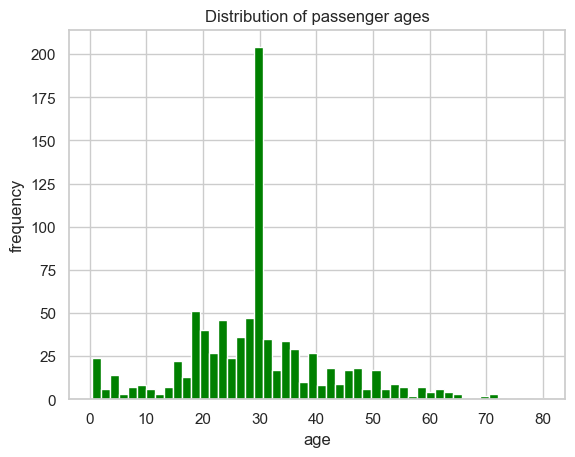

In [107]:
import matplotlib.pyplot as plt
# Create the histogram using Seaborn
plt.hist(clean_titanic['age'],bins=50,color='green')
#Add labels and title to the plot
plt.xlabel('age')
plt.ylabel('frequency')
plt.title('Distribution of passenger ages')

In [108]:
#Survival rate based on the gender
survival_rate_by_gender=clean_titanic.groupby('sex')['survived'].mean()*100
print(survival_rate_by_gender)

sex
female    74.038462
male      18.890815
Name: survived, dtype: float64


In [109]:
#Survival rate based on the passenger class
survival_rate_by_pclass=clean_titanic.groupby('pclass')['survived'].mean()*100
print(survival_rate_by_pclass)

pclass
1    62.616822
2    47.282609
3    24.236253
Name: survived, dtype: float64


Text(0.5, 1.0, 'Count of Passengers in Each Class')

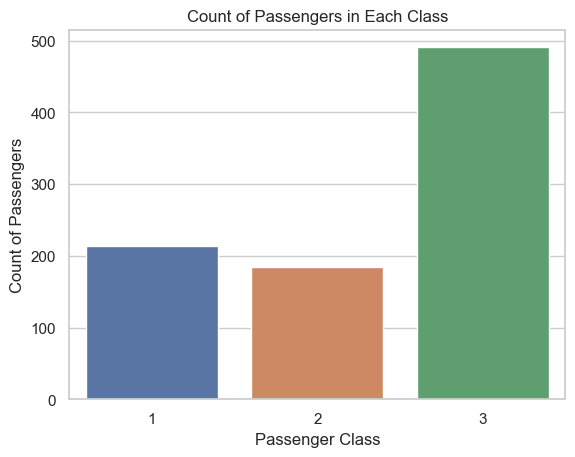

In [110]:
# Count the number of passengers in each class
passenger_count_by_class=clean_titanic['pclass'].value_counts()
# Create the barplot using Seaborn
sns.barplot(x=passenger_count_by_class.index, y=passenger_count_by_class.values)
# Add labels and title to the plot
plt.xlabel('Passenger Class')
plt.ylabel('Count of Passengers')
plt.title('Count of Passengers in Each Class')


Text(0.5, 1.0, 'Distribution of Fares for Each Class')

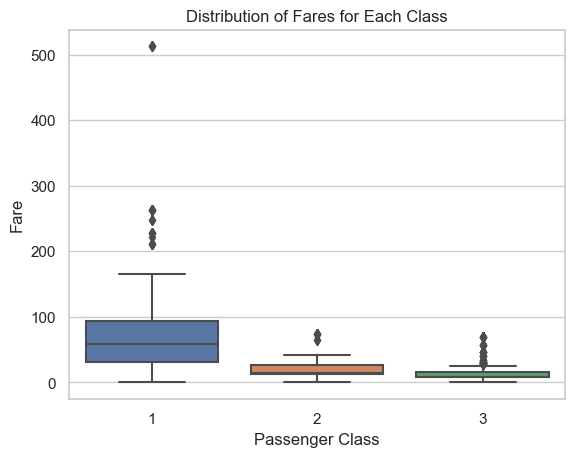

In [111]:
# Create a box plot using Seaborn
sns.boxplot(x='pclass', y='fare', data=clean_titanic)
# Add labels and title to the plot
plt.xlabel('Passenger Class')
plt.ylabel('Fare')
plt.title('Distribution of Fares for Each Class')

([<matplotlib.axis.XTick at 0x1ea2dc82490>,
 [Text(0, 0, 'Non-Survivor'), Text(1, 0, 'Survivor')])

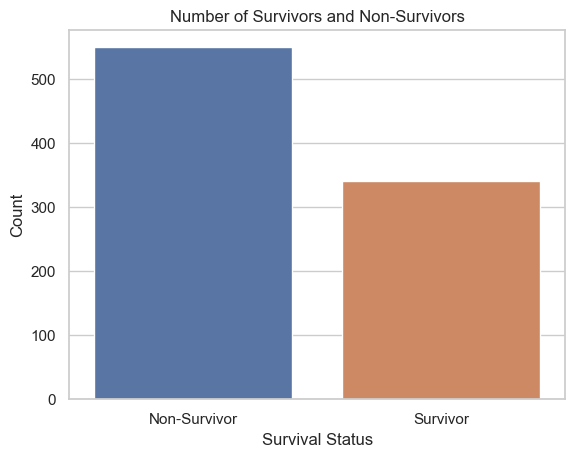

In [112]:
# Create a count plot using Seaborn
sns.countplot(x='survived', data=clean_titanic)
# Add labels and title to the plot
plt.xlabel('Survival Status')
plt.ylabel('Count')
plt.title('Number of Survivors and Non-Survivors')
plt.xticks(ticks=[0, 1], labels=['Non-Survivor', 'Survivor'])

Text(0.5, 1.0, 'Age Distribution of Passengers Across Different Classes')

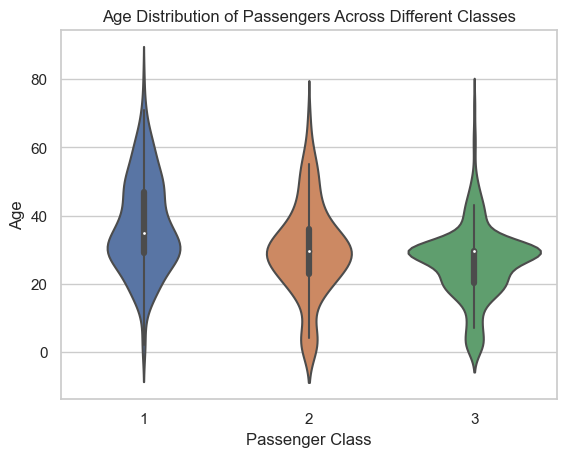

In [113]:
# Create a violin plot using Seaborn
sns.violinplot(x='pclass', y='age', data=clean_titanic)

# Add labels and title to the plot
plt.xlabel('Passenger Class')
plt.ylabel('Age')
plt.title('Age Distribution of Passengers Across Different Classes')


c:\Users\sajee\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


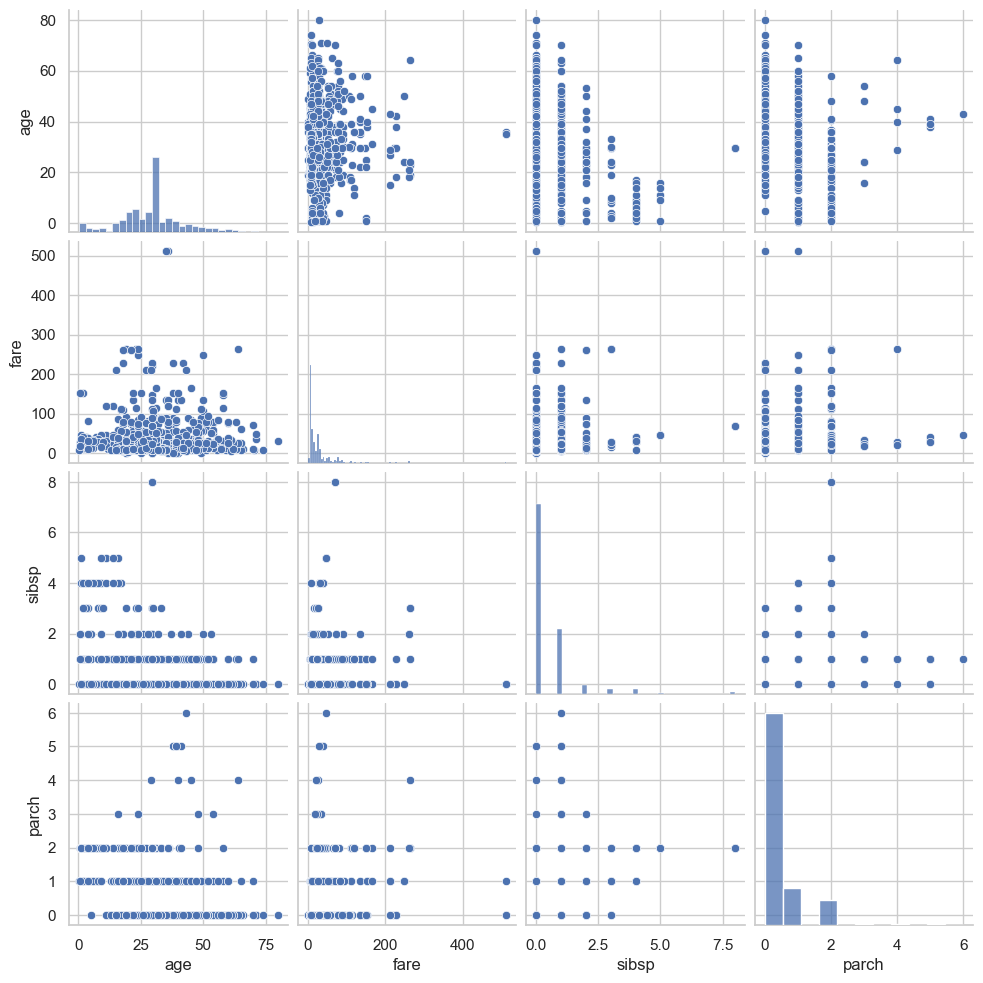

In [114]:
# Select the numerical columns for the pair plot
numerical_columns = ['age', 'fare', 'sibsp', 'parch']

# Create a pair plot using Seaborn
sns.pairplot(clean_titanic[numerical_columns], diag_kind='hist')